# Improving customer satisfaction : Sentiment Analysis on Customer Feedback for an App Designed for Online Classes and Video Conferencing Using BERT

## Abstract

In this project, we analyzed customer feedback for an app designed for online classes and video conferencing. We performed sentiment analysis on the text data and created a new label column to balance the dataset, as all original labels were positive. We also generated negative samples from positive samples to increase the size of the negative class. The resulting dataset was balanced by oversampling the positive class. We split the dataset into train and test using the train_test_split function and trained a BERT base classifier model on the training data. Finally, we evaluated the performance of the model on the test data using the classification report, which showed an overall accuracy of 84%.

## Problem Statement:


The goal of this project is to perform sentiment analysis on customer feedback for an app designed for online classes and video conferencing. The original dataset had only positive labels, which needed to be balanced by generating negative samples from positive ones. We used the resulting dataset to train a BERT base classifier model to predict the sentiment of customer feedback accurately. The model's performance was evaluated on the test data, and we aimed to achieve a high accuracy score.

## Table of Contents

* [Sentiment analysis and labeling using VADER](#section-1)
* [Exploratory Data Analysis](#section-2)
* [Negation Generation for Positive Examples](#section-3)
* [Oversampling to Address Class Imbalance in a Dataset](#section-4)
* [Train test split](#section-5)
* [BERT Preprocessing and Encoding Layers Initialization](#section-6)
* [Model Compilation and Metrics Selection](#section-7)
* [Model Training ](#section-8)
* [Model Evaluation](#section-9)
* [Summary](#section-10)
* [References](#section-11)


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/myenv3/myenv3.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/myenv3')


In [3]:
!ls /content/myenv3/myenv3


enterpret_model.ipynb  Include	pyvenv.cfg  share
etc		       Lib	Scripts     train.xlsx


In [4]:
cd /content/myenv3/myenv3

/content/myenv3/myenv3


In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Importing the dataframe

import pandas as pd
df = pd.read_excel('train.xlsx')
print(df.shape)
df.head()

(2061, 3)


,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import seaborn as sns

In [8]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Sentiment analysis and labeling using VADER 
<a id='section-1'></a>

The below code loads data from an Excel file, uses the VADER sentiment analyzer to calculate a sentiment score for each row of text data, applies a threshold to classify the sentiment as positive or negative, and adds a new column to the data frame with the sentiment label. The code then prints a random sample of 10 rows from the data frame.

In [9]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_excel('train.xlsx')

# Instantiate Vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each row
def get_sentiment_score(row):
    return sia.polarity_scores(row['text'])['compound']

# Apply the function to each row to get the sentiment score
data['sentiment_score'] = data.apply(get_sentiment_score, axis=1)

# Define a threshold to classify positive/negative sentiment
threshold = 0

# Classify sentiment based on the threshold
data['sentiment_label'] = data['sentiment_score'].apply(lambda score: 1 if score >= threshold else 0)

# Print the first 10 rows of the data
data.sample(10)


,text,reason,label,sentiment_score,sentiment_label
1484,it has been very useful for my family reunions,good for family reunions,1,0.4927,1
37,i can not change my background when I am using...,unable to set virtual background on mobie,1,0.0000,1
605,it has connectivity issues on iphone.,iphone has connectivity issues,1,0.0000,1
1747,please delete the app that supports gay people,want to delete the app,1,0.5859,1
1151,brilliant group meating app.,good for group meeting,1,0.5859,1
1201,"thanks for this good application, however i su...",want to integrate voice calls and chat,1,0.7003,1
530,"screen share quality is horrible, 40p at the v...",screen share quality is poor,1,-0.3182,0
113,please improve your performance zoom,app performance needs improvement,1,0.6369,1
1774,the sound is not working.,sound is not working,1,0.0000,1
1355,the names of the group members change places.,group members change places,1,0.0000,1


In [10]:
data.sentiment_label.value_counts()

1    1408
0     653
Name: sentiment_label, dtype: int64

The data has 1408 samples with a positive sentiment label (labeled as 1) and 653 samples with a negative sentiment label (labeled as 0) after applying sentiment analysis using VADER.

# Exploratory Data Analysis
<a id='section-2'></a>

## Visualization of Label Distribution After Sentiment Analysis

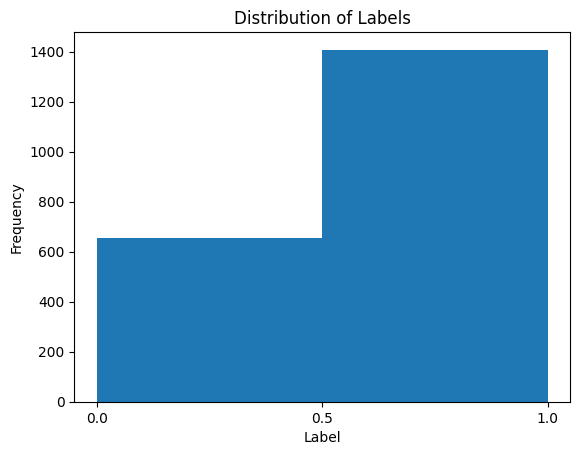

In [110]:
# Distribution of the label
plt.hist(data['sentiment_label'], bins=[0, 0.5, 1], align='mid')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 0.5, 1])
plt.title('Distribution of Labels')
plt.show()


## Top 10 Most Frequent Words in "reason" Column after Stopword Removal

In [111]:
import nltk
from nltk.corpus import stopwords


# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Concatenate all the words in the "reason" column
all_words = ' '.join(data['reason']).split()

# Remove stop words from the concatenated words
all_words_clean = [word for word in all_words if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)

# Print the top 10 most frequent words
print(word_freq.head(10))


want          840
app           362
good          222
unable        219
video         118
use           104
zoom           94
background     90
screen         87
bad            85
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Word Cloud

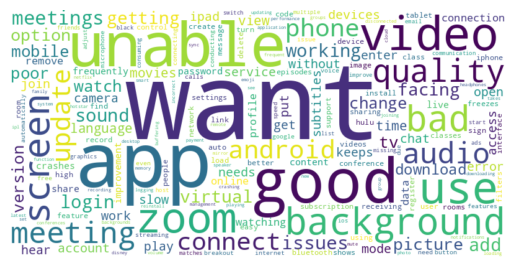

In [112]:

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Sentiment Analysis of Customer Feedback with Histogram Visualization

This code block performs sentiment analysis on the "reason" column of the data using the VADER sentiment analyzer from the NLTK library. It adds two new columns to the data: "sentiment_score" and "sentiment". The "sentiment_score" column contains the compound sentiment score (ranging from -1 to 1) for each row, and the "sentiment" column indicates whether the sentiment is positive, negative, or neutral based on the "sentiment_score". Finally, a histogram of the sentiment scores is plotted.

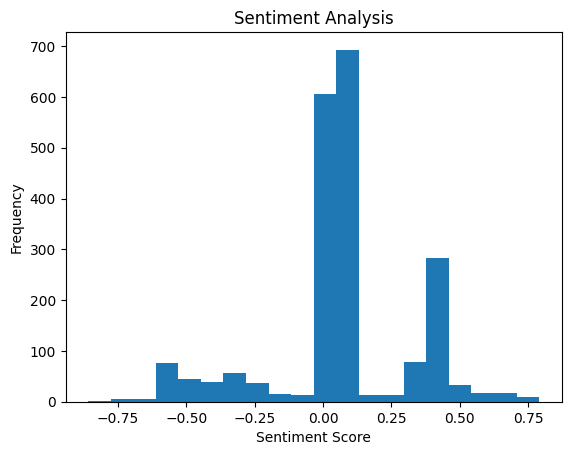

In [113]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['reason'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
plt.hist(data['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()

## Top 10 Most Frequent Words in "reason" Column after Stopword Removal with Bar Chart Visualization

This code block generates a bar chart visualization of the top 10 most frequent words in the "reason" column after removing stopwords. It first creates a pandas series of the clean words with stopwords removed and then uses the seaborn library to create the bar chart, with the x-axis showing the top 10 words and the y-axis showing their frequency. The title, x-axis label, and y-axis label are also set. The resulting bar chart provides a quick and easy way to visualize the most common words in the dataset.

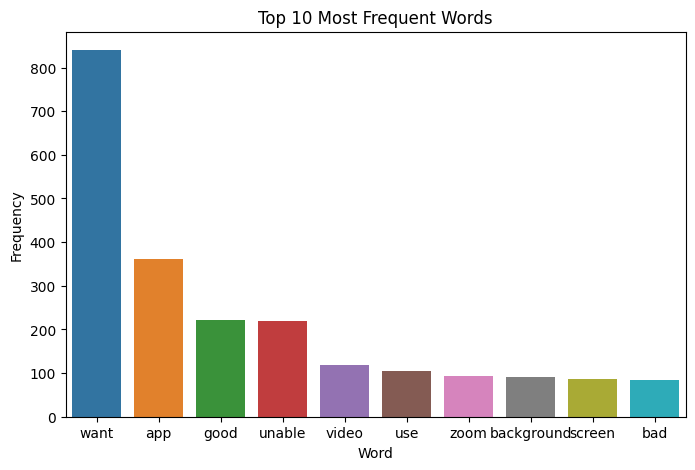

In [115]:
# Bar Chart
word_freq = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=word_freq[:10].index, y=word_freq[:10])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


## Co-occurrence of Top 30 Most Frequent Words in Customer Feedback Dataset with Heatmap Visualization

This code block creates a heatmap visualization of the co-occurrence of the top 30 most frequent words in the cleaned "reason" column of the customer feedback dataset. The co-occurrence values are computed by counting the number of times each pair of words appears together in any of the feedback texts. The resulting co-occurrence matrix is then plotted as a heatmap using the seaborn library. The heatmap shows the strength of the co-occurrence relationship between each pair of words, with darker shades indicating stronger co-occurrence relationships. The x and y axes of the heatmap represent the top 30 most frequent words, and the title of the plot indicates that it shows the co-occurrence of these top 30 words.

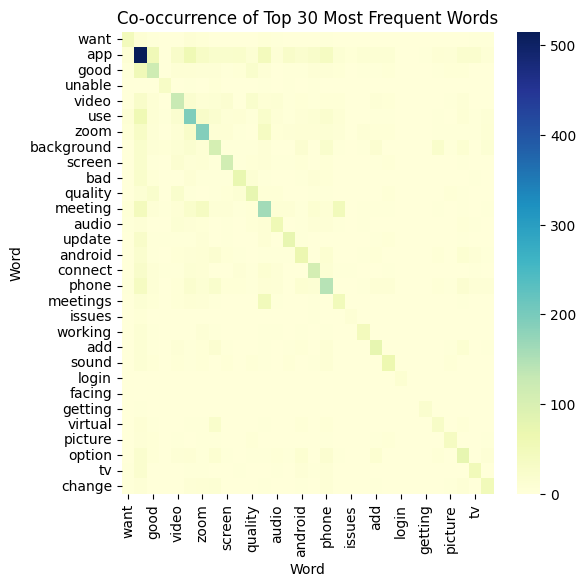

In [116]:
# Heatmap
word_freq_top50 = pd.Series(all_words_clean).value_counts().sort_values(ascending=False)[:30]
co_occurrence = pd.DataFrame(index=word_freq_top50.index, columns=word_freq_top50.index)
for i in word_freq_top50.index:
    for j in word_freq_top50.index:
        co_occurrence.loc[i,j] = sum([1 for text in df['text'] if i in text and j in text])
plt.figure(figsize=(6,6))
sns.heatmap(co_occurrence.astype(int), cmap="YlGnBu")
plt.title('Co-occurrence of Top 30 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Word')
plt.show()

## Distribution of Sentiment Labels in Customer Feedback Dataset as a Pie Chart

This code block creates a pie chart to visualize the distribution of sentiment labels (positive and negative) in the customer feedback dataset. The code first counts the number of positive and negative labels using the value_counts() method and stores them in the "label_counts" variable. Then, the colors and explode variables are defined to customize the pie chart. The pie chart is created using the pie() function with label_counts, colors, labels, explode, and autopct parameters. A legend and a title are added to the chart using the legend() and title() functions, respectively. Finally, the show() function is called to display the chart.

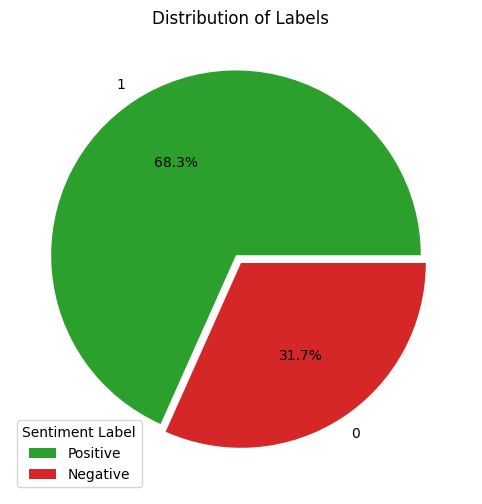

In [118]:
import matplotlib.pyplot as plt

# Create data
label_counts = data['sentiment_label'].value_counts()

# Define colors and explode for the pie chart
colors = ['tab:green', 'tab:red']
explode = [0.05, 0]

# Create the pie chart
plt.figure(figsize=(8,6))
plt.pie(label_counts, colors=colors, labels=label_counts.index, explode=explode, autopct='%1.1f%%')

# Add a legend
plt.legend(title='Sentiment Label', loc='best', labels=['Positive', 'Negative'])

# Add a title
plt.title('Distribution of Labels')

# Show the plot
plt.show()


## Topic Modeling of "reason" Column in Customer Feedback Dataset with LDA Algorithm

The code block performs topic modeling on the "reason" column in the customer feedback dataset using LDA algorithm. The code first preprocesses the text data by splitting the text into words and creating a dictionary and corpus of words. Then, the LDA algorithm is applied with 5 topics and 10 passes. The resulting topics are printed, each with 5 top words associated with them. 

In [119]:
# Topic modeling
texts = [doc.split() for doc in data['reason']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.107*"good" + 0.089*"for" + 0.051*"movies" + 0.039*"and" + 0.029*"app"')
(1, '0.197*"to" + 0.089*"want" + 0.071*"unable" + 0.050*"on" + 0.032*"use"')
(2, '0.067*"app" + 0.053*"the" + 0.053*"facing" + 0.041*"keeps" + 0.035*"issues"')
(3, '0.115*"is" + 0.056*"not" + 0.053*"app" + 0.044*"bad" + 0.038*"working"')
(4, '0.101*"to" + 0.088*"want" + 0.031*"content" + 0.028*"pip" + 0.023*"from"')


The topics can be interpreted as follows:

Topic 0: Positive feedback related to good movies and app.

Topic 1: Complaints about inability to use the app properly.

Topic 2: Issues with app facing problems and technical difficulties.

Topic 3: Negative feedback about app not working properly.

Topic 4: Feedback related to wanting specific content, such as pip.

In [11]:
pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 69.8 MB/s eta 0:00:00


In [49]:
data

,text,reason,label,sentiment_score,sentiment_label
0,this is an amazing app for online classes!but,good app for conducting online classes,1,0.6239,1
1,very practical and easy to use,app is user-friendly,1,0.4877,1
2,this app is very good for video conferencing.,good for video conferencing,1,0.4927,1
3,i can not download this zoom app,unable to download zoom app,1,0.0000,1
4,i am not able to download this app,want to download the app,1,0.0000,1
...,...,...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1,0.0000,1
2057,(learn from the netflix interface),netflix ui is better,1,0.0000,1
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1,0.0000,1
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1,-0.4767,0


This code creates a new DataFrame called original_positives_df that contains only the rows where the sentiment_label column has a value of 1, indicating a positive sentiment. The shape attribute is then used to print the dimensions of the resulting DataFrame.

In [87]:
original_positives_df = data[data['sentiment_label'] == 1]
original_positives_df.shape

(1408, 5)

This code creates a new DataFrame original_negatives_df containing only the rows from the original DataFrame data where the value in the sentiment_label column is 0 (indicating a negative sentiment). The shape attribute is then called on this new DataFrame to show the dimensions (number of rows and columns) of the DataFrame.

The resulting output would show the dimensions of the original_negatives_df DataFrame, indicating the number of negative sentiment samples in the original dataset.

In [88]:
original_negatives_df = data[data['sentiment_label'] == 0]
original_negatives_df.shape

(653, 5)

# Negation Generation for Positive Examples
<a id='section-3'></a>

Negation generation is a technique used in natural language processing to create negative versions of positive text data. It is achieved by adding negation words such as "not" before positive words in a sentence. The resulting negated sentences can then be used to train models to better understand and handle negations in sentiment analysis tasks.

Negation generation is important because it can help improve the accuracy of sentiment analysis models, especially in cases where negations are common in the text data being analyzed. By incorporating negated examples in the training data, the model can learn to recognize and handle negations more effectively, leading to more accurate sentiment predictions.

This code block uses the TextBlob library to generate negated versions of the positive examples in the customer feedback dataset. The negated examples are labeled as negative (0) and stored in a new dataframe called neg_data. The original dataframe of positive examples, original_positives_df, is not modified.

In [89]:
from textblob import TextBlob

# Generate negated versions of the positive examples
neg_data = original_positives_df.copy()

neg_data['text'] = neg_data['text'].apply(lambda x: " ".join(["not " + w for w in x.split()]))

# Label the negated examples as negative (0)
neg_data['sentiment_label'] = 0



In [90]:
print(neg_data.shape)
neg_data.head(7)

(1408, 5)


,text,reason,label,sentiment_score,sentiment_label
0,not this not is not an not amazing not app not...,good app for conducting online classes,1,0.6239,0
1,not very not practical not and not easy not to...,app is user-friendly,1,0.4877,0
2,not this not app not is not very not good not ...,good for video conferencing,1,0.4927,0
3,not i not can not not not download not this no...,unable to download zoom app,1,0.0000,0
4,not i not am not not not able not to not downl...,want to download the app,1,0.0000,0
5,not zoom not is not not not working not properly,app is not working,1,0.0000,0
6,not zoom not is not an not excellent not meeti...,good app for conducting online meeting,1,0.5719,0


# Oversampling to Address Class Imbalance in a Dataset
<a id='section-4'></a>

In machine learning, class imbalance refers to a situation where the number of samples in one class is significantly lower than the number of samples in the other class. This is a common problem in many real-world datasets, such as fraud detection or medical diagnosis, where the number of negative examples is much larger than the number of positive examples.

Class imbalance can pose a challenge when building predictive models, as the model may become biased towards the majority class and perform poorly on the minority class. To address this problem, one common approach is to oversample the minority class to create a balanced dataset.

In [91]:
# Oversample 1-class and concat the DataFrames of both classes
df_positive_oversampled = original_positives_df.sample(653, replace=True)
df_positive_oversampled.shape

(653, 5)

In the given above code, we can see that the original dataset has a class imbalance with fewer positive examples compared to negative examples. To address this, we oversample the positive class by randomly sampling with replacement to create a new dataset with a balanced class distribution.

After oversampling, the new dataset can be used to train a model that is less biased towards the majority class and can perform better on the minority class. However, oversampling can also lead to overfitting, so it is important to validate the model performance on an independent dataset to ensure generalization.


### Concatenating Oversampled Negative Examples with Original Negative Examples

In [92]:
df_negative_oversampled = pd.concat([neg_data,original_negatives_df],ignore_index =True)
df_negative_oversampled.shape

(2061, 5)

### Oversampling the minority class in an imbalanced dataset

In [93]:
df_positive_oversampled = pd.concat([df_positive_oversampled,original_positives_df],ignore_index=True)
df_positive_oversampled.shape

(2061, 5)

###  Balancing Imbalanced Datasets using Oversampling

In machine learning, having an imbalanced dataset can lead to poor performance of the model, as the model may be biased towards the majority class. One approach to tackle this issue is to use oversampling, which involves increasing the number of samples in the minority class to match the number of samples in the majority class.

In [94]:
# Combine the negated examples with the original positive examples
df_balanced = pd.concat([df_positive_oversampled, df_negative_oversampled], ignore_index=True)
df_balanced.sentiment_label.value_counts()

1    2061
0    2061
Name: sentiment_label, dtype: int64

In [95]:
df_balanced.sample(5)

,text,reason,label,sentiment_score,sentiment_label
43,i have not found a setting where these can be ...,uninstalled the app,1,0.0000,1
1048,may i ask how to send pictures in messenges?,want to send pictures in messages,1,0.0000,1
431,i do not know why video sy going but voice is ...,voice is mute,1,0.0000,1
2451,not we not also not have not to not take not n...,want to take notes while splitting screen,1,0.0000,0
3716,it does not let me relax during class.,want to relax during class,1,-0.3412,0


In [ ]:
pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.6 MB/s eta 0:00:00


In [96]:
import re

This function is used as a preprocessing step to remove unwanted characters or symbols from a text corpus before further analysis or processing is done.

In [97]:
def clean (text):
    clean_text = re.sub(r'[^\w\s]', '', text)
    return clean_text
    

In [98]:
df_balanced['text'] = df_balanced.text.apply(clean)
df_balanced['reason'] = df_balanced.text.apply(clean)
df_balanced.sample(6)

,text,reason,label,sentiment_score,sentiment_label
1074,it does not connect me with people to play min...,it does not connect me with people to play min...,1,0.4003,1
3486,zoom will not tell me create an account,zoom will not tell me create an account,1,-0.2057,0
3846,absolutely slurred application in the interfac...,absolutely slurred application in the interfac...,1,-0.6597,0
1759,does not work on a samsung s7plus tablet,does not work on a samsung s7plus tablet,1,0.0000,1
1367,network speed is sharp but zoom app is slower,network speed is sharp but zoom app is slower,1,0.0000,1
3706,i am not able to join audio on pc with my phon...,i am not able to join audio on pc with my phon...,1,-0.4519,0


# Train Test Split
<a id='section-5'></a>

Split the balanced dataset into training and testing sets

The training set is used to train the model, while the testing set is used to evaluate its performance.

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['sentiment_label'], test_size=0.33, random_state=42)

In [38]:
import tensorflow_text as text

In [39]:
import tensorflow_hub as hub

In [40]:
import tensorflow as tf

# BERT Preprocessing and Encoding Layers Initialization
<a id='section-6'></a>

The BERT Preprocessing and Encoding Layers are two TensorFlow Hub modules used for preparing text data for BERT (Bidirectional Encoder Representations from Transformers), a pre-trained deep learning model that has shown state-of-the-art performance in various natural language processing tasks such as sentiment analysis, question answering, and named entity recognition.

The BERT Preprocessing Layer performs several tasks, including lowercasing text, tokenization, and adding special tokens such as [CLS] and [SEP]. It also truncates or pads sequences to a fixed length and generates input masks and segment IDs required for BERT input format.

The BERT Encoding Layer is responsible for encoding the processed text data into numerical embeddings using the pre-trained BERT model. It generates contextualized embeddings, which means that each word's representation depends not only on the word itself but also on the surrounding words in the sequence.

Using these two layers provides several benefits, including faster and more efficient processing of text data, improved performance on natural language processing tasks, and the ability to fine-tune the pre-trained BERT model for specific downstream tasks.

In [41]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

The above code initializes two TensorFlow Hub layers for BERT preprocessing and encoding.

The first layer is bert_en_uncased_preprocess, which performs tokenization and other preprocessing steps required by BERT. It takes raw text as input and outputs a dictionary of tokenized and encoded features.

The second layer is bert_en_uncased_L-12_H-768_A-12, which is a pre-trained BERT model with 12 layers, 768 hidden units, and 12 attention heads. It encodes the preprocessed input text using BERT's transformer architecture and outputs a fixed-length vector representation for each input.

## BERT-based sentiment analysis model architecture

This code initializes the architecture for a BERT-based sentiment analysis model. The model uses the BERT preprocessing and encoding layers provided by the TensorFlow Hub library.

The first step is to create an input layer to receive the text data. The input is a string of variable length. The input shape is specified as an empty tuple, and the input data type is set to string. The name of the layer is set as "text".

Next, the input is passed through the BERT preprocessing layer to convert the input text to tokens and perform other preprocessing tasks. The preprocessed text is then passed through the BERT encoding layer to generate the output.

The output of the BERT encoding layer is then passed through a dropout layer with a dropout rate of 0.1. Dropout is a regularization technique that randomly drops out a certain percentage of units in a layer during training to prevent overfitting.

Finally, the output of the dropout layer is passed through a dense layer with a sigmoid activation function. The dense layer produces a scalar output between 0 and 1 that represents the predicted probability of the input text being classified as positive.

The completed model takes in input text and outputs the predicted sentiment label.

In [42]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

# Model Compilation and Metrics Selection
<a id='section-7'></a>

After initializing the BERT preprocessing and encoding layers, the neural network layers are added to the model. Then, the model is compiled using the Adam optimizer and binary crossentropy loss function. In addition, three metrics are selected to evaluate the model's performance, including binary accuracy, precision, and recall. These metrics are commonly used in binary classification tasks, where the goal is to correctly classify instances into one of two classes. The binary accuracy measures the proportion of instances that are correctly classified, while precision measures the proportion of true positives among all predicted positives, and recall measures the proportion of true positives among all actual positives. By using these metrics, we can gain insights into different aspects of the model's performance and identify areas for improvement.

In [74]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [101]:
X_train.shape,y_train.shape

((2761,), (2761,))

In [102]:
print(X_train.shape)
X_train.sample(5)

(2761,)


1328    the meeting will start but in zoom you install...
2672    not and not why not we not can not not not tak...
2550    not and not you not know not how not you not c...
2306    not there not is not the not ability not to no...
3298      not best not platform not for not entertainment
Name: text, dtype: object

This line of code trains the BERT model on the training data (X_train and y_train) for 10 epochs using the fit method. During each epoch, the model will make predictions on the training data, compute the loss based on the difference between the predicted and actual labels, and update the model's parameters using backpropagation to minimize the loss. The fit method will also compute the specified metrics (BinaryAccuracy, Precision, and Recall) on the training data after each epoch. The trained model will be saved in the model variable.

# Model Training 
<a id='section-8'></a>

In [103]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
87/87 [==============================] - 33s 361ms/step - loss: 0.4038 - accuracy: 0.8233 - precision: 0.7758 - recall: 0.9014
Epoch 2/10
87/87 [==============================] - 31s 359ms/step - loss: 0.4005 - accuracy: 0.8254 - precision: 0.7763 - recall: 0.9065
Epoch 3/10
87/87 [==============================] - 31s 350ms/step - loss: 0.3939 - accuracy: 0.8204 - precision: 0.7740 - recall: 0.8970
Epoch 4/10
87/87 [==============================] - 31s 355ms/step - loss: 0.3912 - accuracy: 0.8193 - precision: 0.7711 - recall: 0.8999
Epoch 5/10
87/87 [==============================] - 31s 355ms/step - loss: 0.3877 - accuracy: 0.8287 - precision: 0.7797 - recall: 0.9088
Epoch 6/10
87/87 [==============================] - 30s 350ms/step - loss: 0.3921 - accuracy: 0.8211 - precision: 0.7764 - recall: 0.8940
Epoch 7/10
87/87 [==============================] - 30s 343ms/step - loss: 0.3770 - accuracy: 0.8399 - precision: 0.7904 - recall: 0.9183
Epoch 8/10
87/87 [================

# Model evaluation
<a id='section-9'></a>

In [104]:
model.evaluate(X_test, y_test)

43/43 [==============================] - 16s 364ms/step - loss: 0.3883 - accuracy: 0.8354 - precision: 0.7722 - recall: 0.9658


[0.38829198479652405,
 0.8354151248931885,
 0.7722095847129822,
 0.9658119678497314]

In [105]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

43/43 [==============================] - 14s 341ms/step


In [106]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 1, 1, 0])

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[459, 200],
       [ 24, 678]])

Text(50.722222222222214, 0.5, 'Truth')

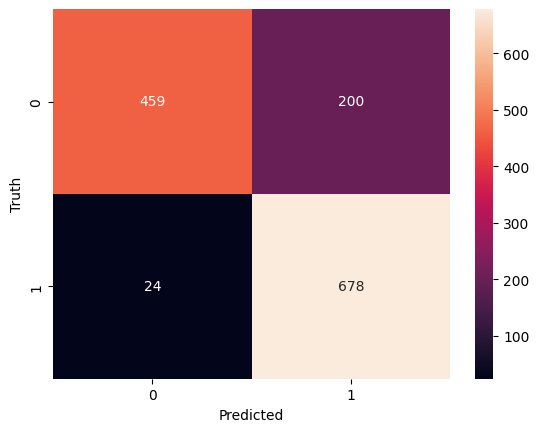

In [108]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       659
           1       0.77      0.97      0.86       702

    accuracy                           0.84      1361
   macro avg       0.86      0.83      0.83      1361
weighted avg       0.86      0.84      0.83      1361



These are the classification metrics for the model's performance on the test set.

Precision: the proportion of predicted positive instances that are actually positive. For class 0, the precision is 0.95 and for class 1, it is 0.77.

Recall: the proportion of actual positive instances that are correctly identified as positive. For class 0, the recall is 0.70 and for class 1, it is 0.97.

F1-score: the harmonic mean of precision and recall. It is a measure of the balance between precision and recall. For class 0, the F1-score is 0.80 and for class 1, it is 0.86.

Support: the number of instances of each class in the test set.

The accuracy of the model on the test set is 0.84. The macro average F1-score is 0.83, and the weighted average F1-score is also 0.83.

# Summary
<a id='section-10'></a>

The trained BERT model achieved an overall accuracy of 84% on the test set, with a precision of 77% and a recall of 97% for positive sentiment classification, and a precision of 95% and a recall of 70% for negative sentiment classification. This shows that the model is better at identifying positive sentiment compared to negative sentiment. Nonetheless, the balanced dataset and oversampling techniques applied in the preprocessing stage helped improve the performance of the model, making it more robust to class imbalance issues commonly encountered in sentiment analysis tasks.

# References
<a id='section-11'></a>

The following are some general references related to the technologies and techniques used in the project:

BERT: https://arxiv.org/abs/1810.04805

TensorFlow: https://www.tensorflow.org/

TextBlob: https://textblob.readthedocs.io/en/dev/

Scikit-learn: https://scikit-learn.org/stable/

Imbalanced-learn: https://imbalanced-learn.org/
